# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [1]:
student_number = 400105155
full_name = "Danial Gharib"
assert student_number and full_name is not None, 'pls input your information'

# Introduction 

In this assignment, you will implement PCA and try to interpret it.

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [30]:
#TODO

df = pd.read_csv("nutrition.csv")
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [31]:
#TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [32]:
#TODO
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.set_index('ID', inplace=True)
numeric_features.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

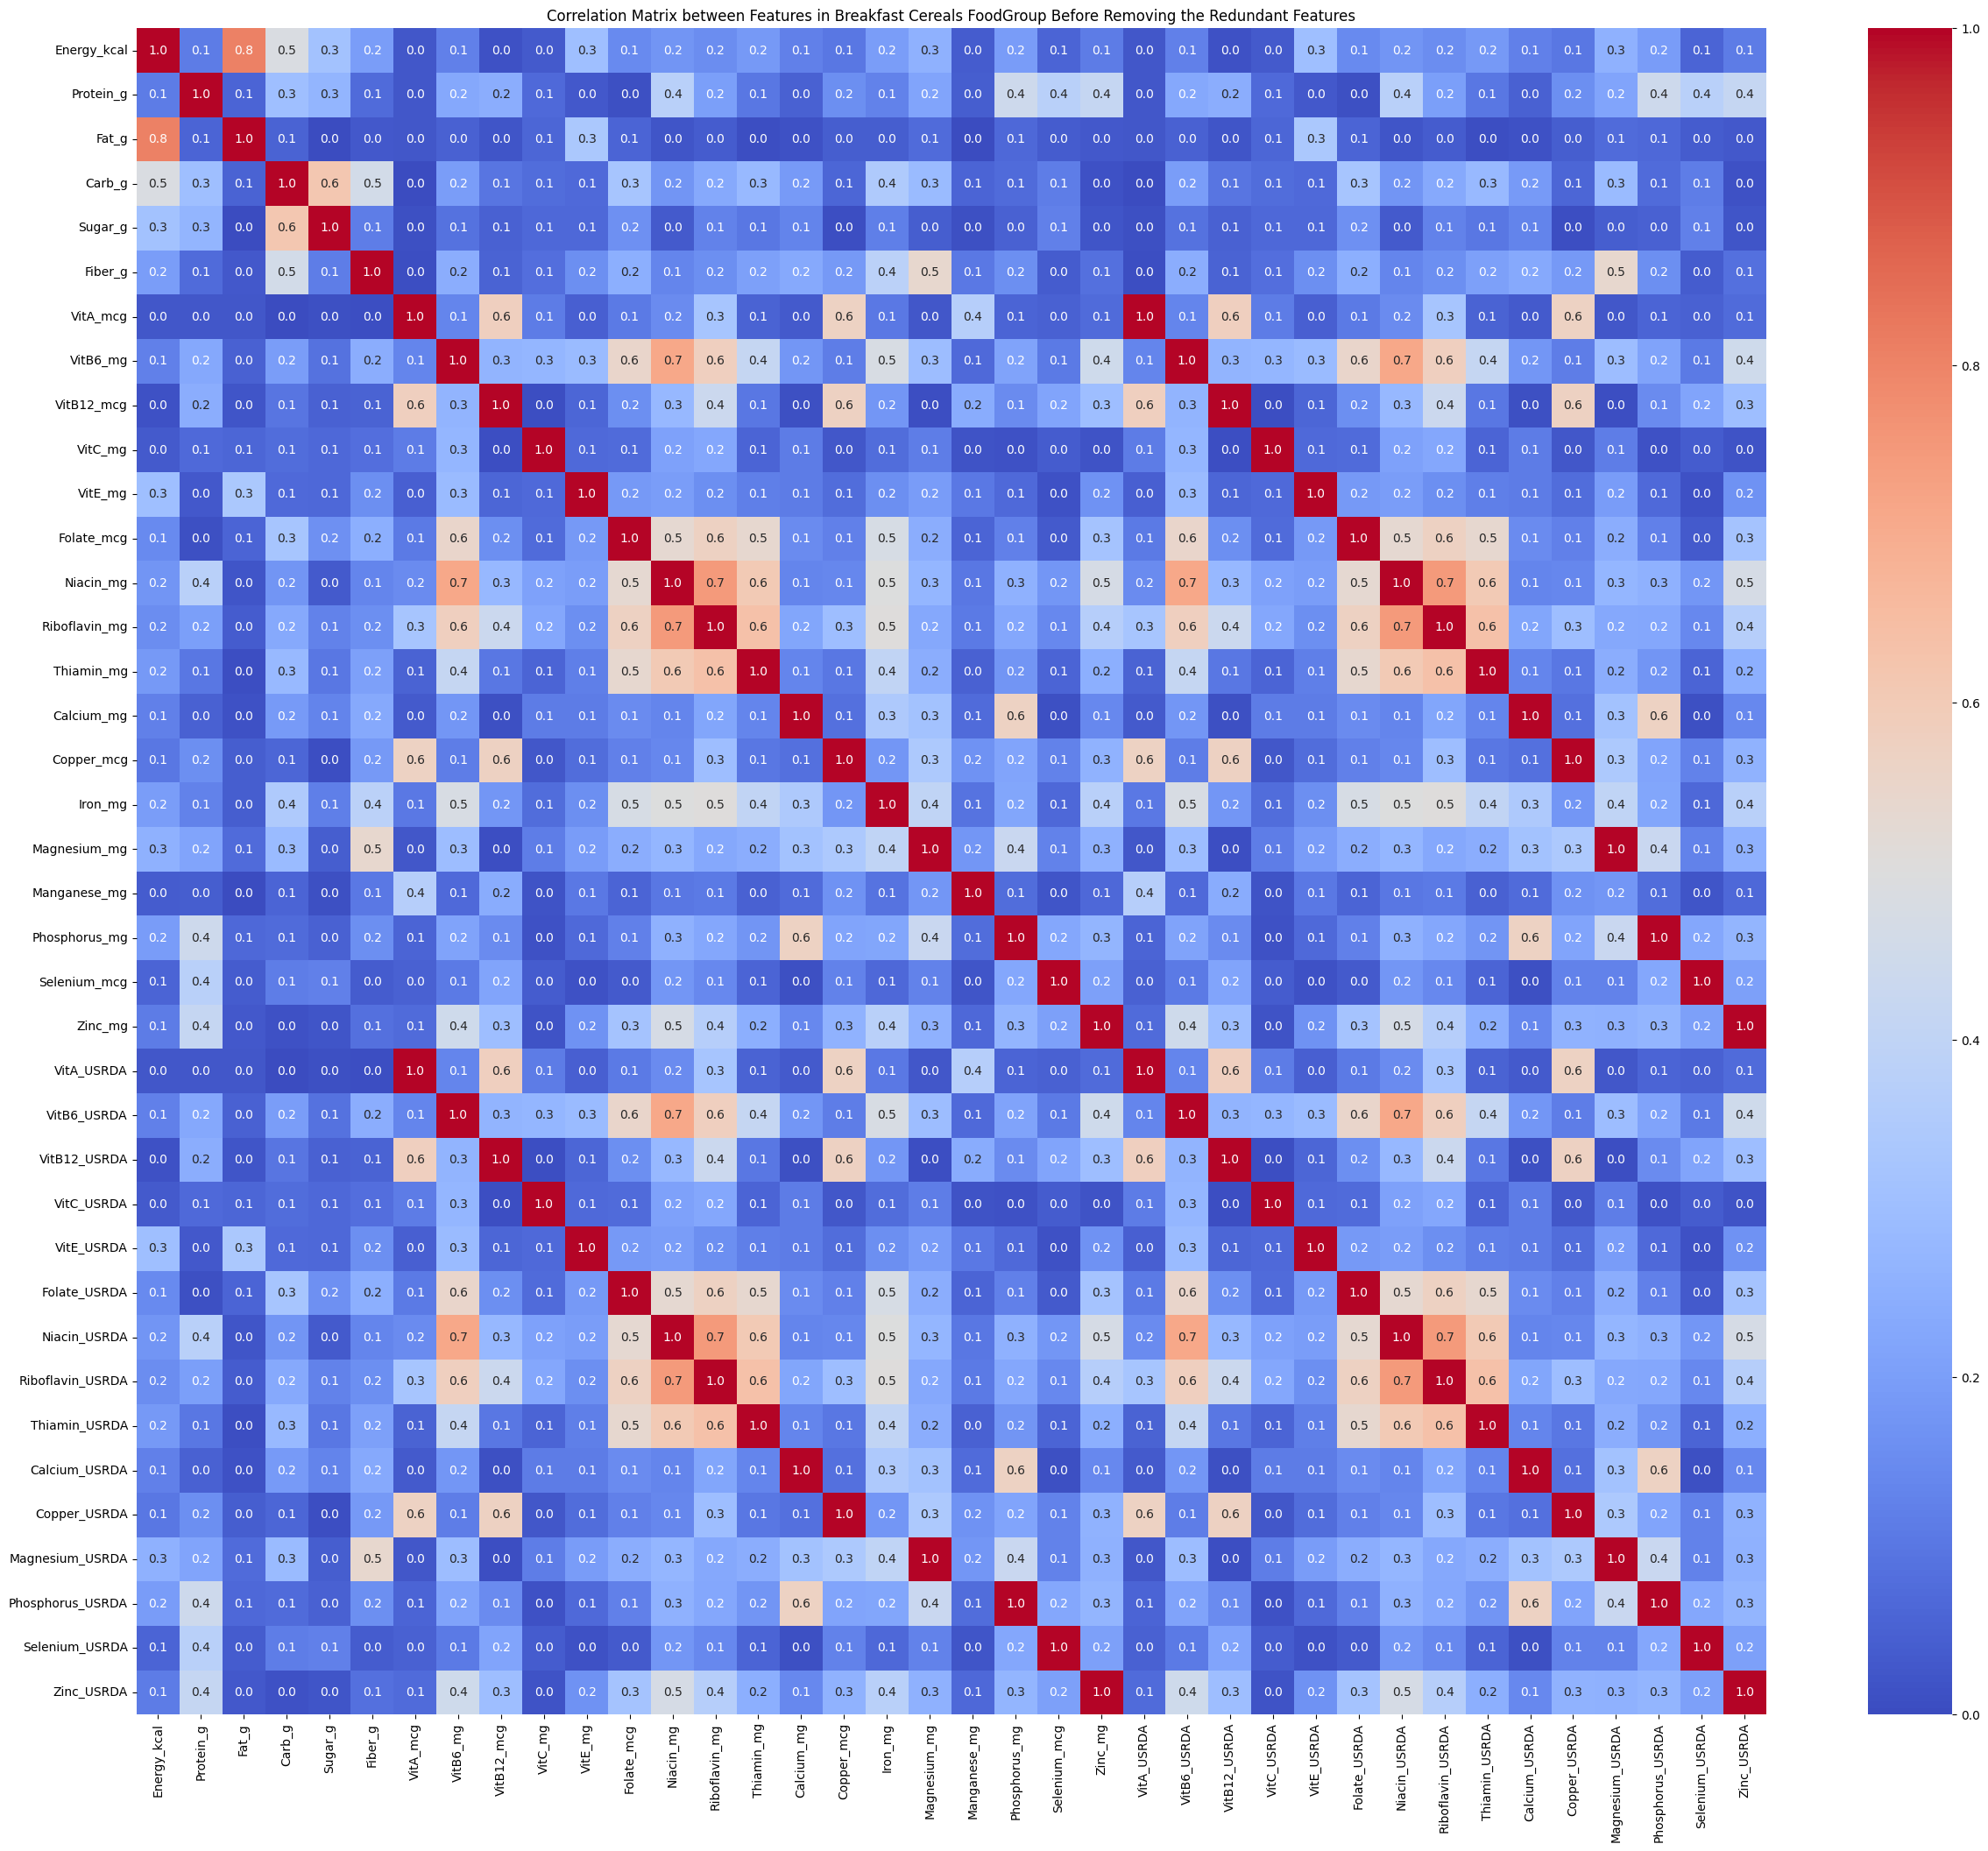

In [33]:
#TODO

corr_matrix = numeric_features.corr().abs()

plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f',vmin=0, vmax=1)
plt.title('Correlation Matrix between Features in Breakfast Cereals FoodGroup Before Removing the Redundant Features')
plt.show()



Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

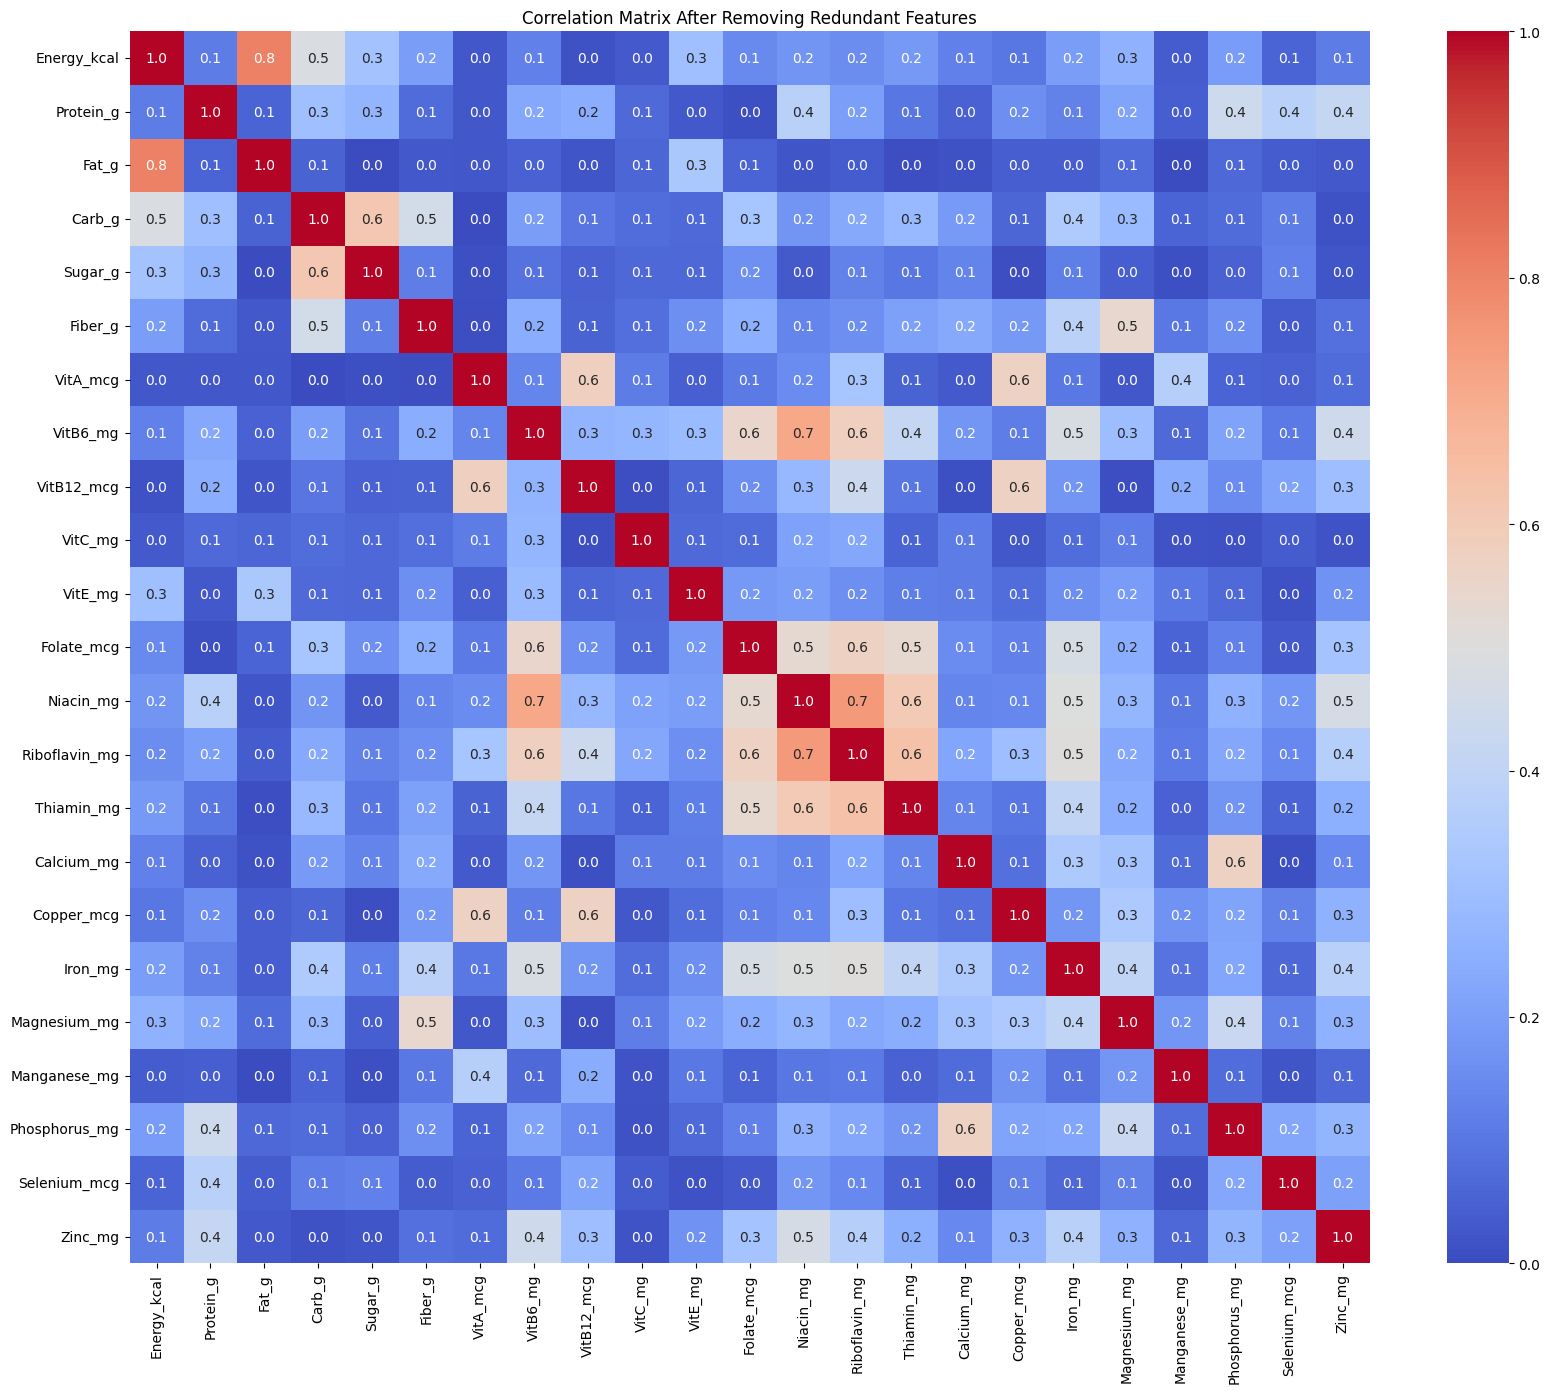

In [34]:
#TODO

redundant_columns = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.9:
            colname = corr_matrix.columns[j]
            redundant_columns.add(colname)

numeric_features_wo_redundancy = numeric_features.drop(columns=redundant_columns)

plt.figure(figsize=(20, 16))
sns.heatmap(numeric_features_wo_redundancy.corr().abs(), annot=True, fmt=".1f",cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix After Removing Redundant Features')
plt.show()

Explore the dataset by plotting the distribution of each feature separately.

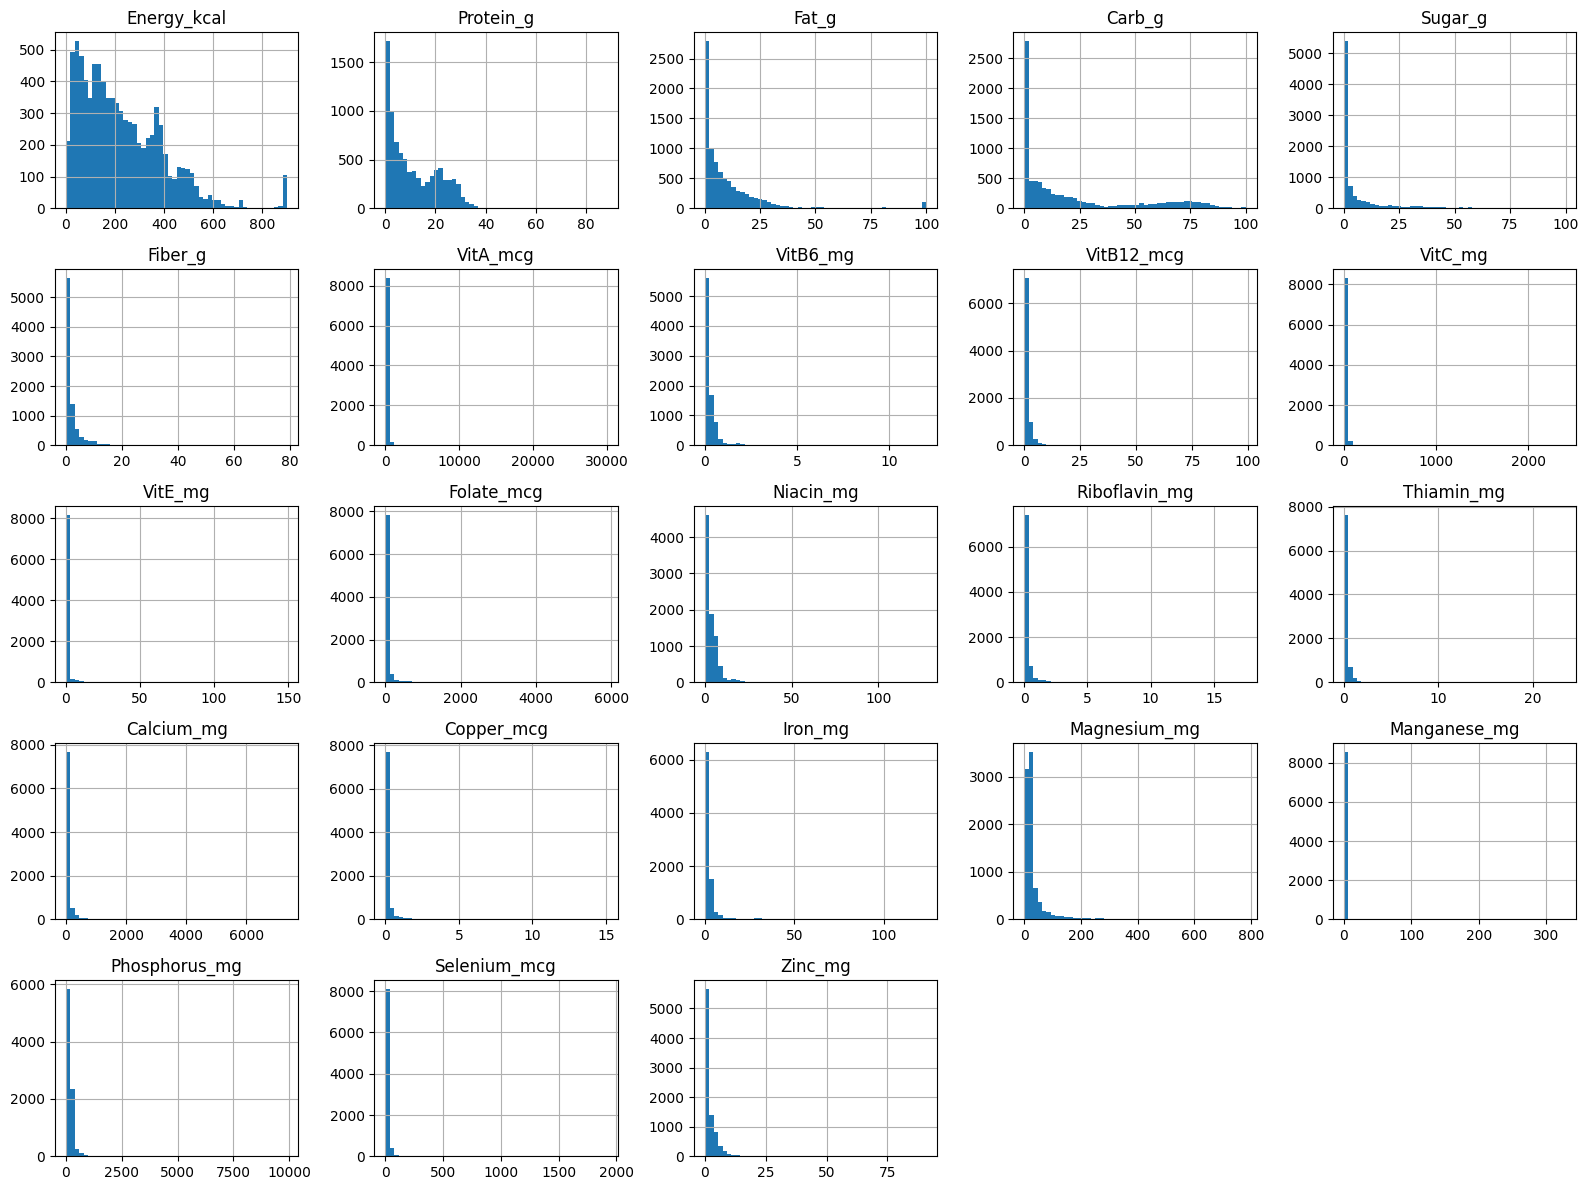

In [35]:
#TODO
numeric_columns = numeric_features_wo_redundancy.columns

plt.figure(figsize=(16, 12))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)
    plt.hist(numeric_features_wo_redundancy[column], bins=50)
    plt.title(column)
    # plt.xlabel("value")
    # plt.ylabel("freq")
    plt.grid(True)
plt.tight_layout()
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [36]:
from scipy.stats import boxcox
# Assuming df is our pandas DataFrame containing numerical features
# df_boxcoxed will be a numpy array
numeric_features_wo_redundancy_cpy = numeric_features_wo_redundancy.copy()
numeric_features_wo_redundancy_cpy = numeric_features_wo_redundancy_cpy + 1
df_boxcoxed = pd.DataFrame(index=numeric_features_wo_redundancy_cpy.index)

for i in numeric_features_wo_redundancy.columns.values:
    df_boxcoxed["%s_boxcoxed" % i] = boxcox(numeric_features_wo_redundancy_cpy.loc[:, i])[0]


Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

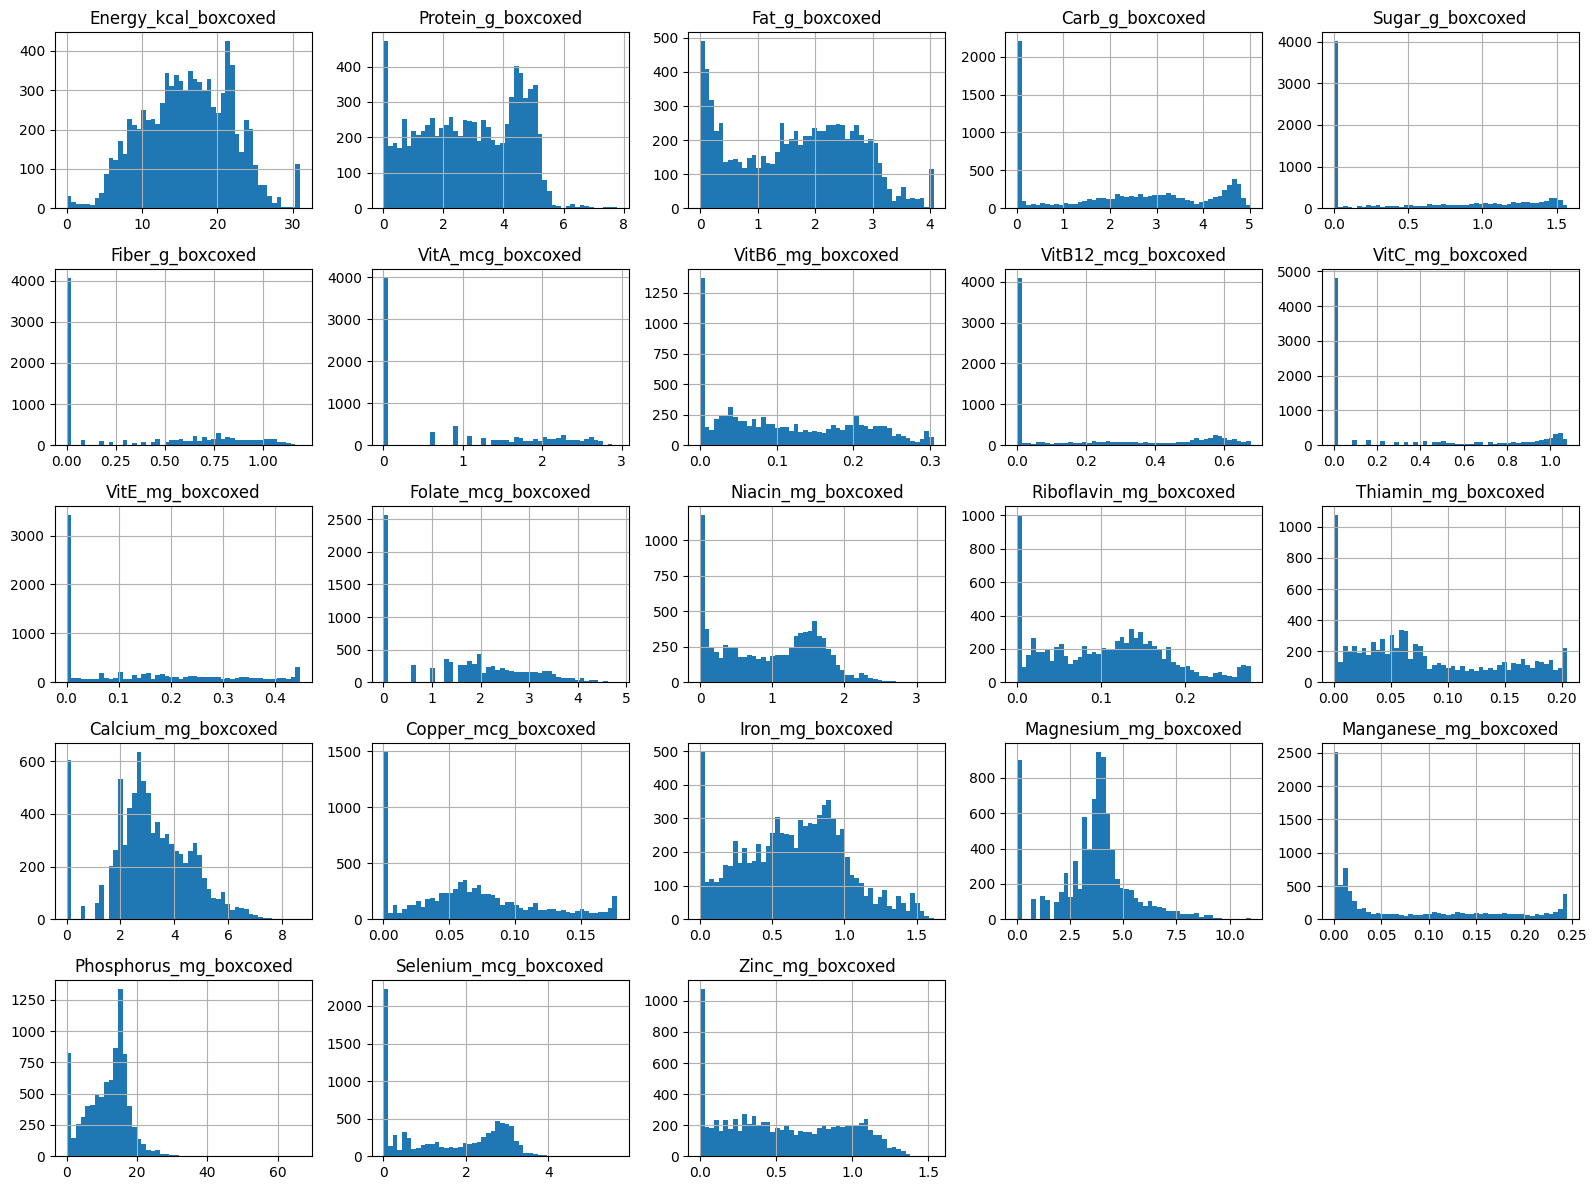

In [37]:
#TODO

plt.figure(figsize=(16, 12))

for i, column in enumerate(df_boxcoxed.columns, 1):
    plt.subplot(5, 5, i)
    plt.hist(df_boxcoxed[column], bins=50)
    plt.title(column)
    # plt.xlabel("value")
    # plt.ylabel("freq")
    plt.grid(True)
plt.tight_layout()
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [40]:
#TODO

scaler = StandardScaler()

df_boxcoxed_scaled = pd.DataFrame(scaler.fit_transform(df_boxcoxed), columns=df_boxcoxed.columns, index=df_boxcoxed.index)

print(f"total mean {df_boxcoxed_scaled.values.mean()}")
print(f"total standard dev : {df_boxcoxed_scaled.values.std()}")

total mean -5.1906821989396566e-17
total standard dev : 1.0


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [58]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        #TODO
        
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        cov_matrix = np.cov(X_centered, rowvar=False)
        # cov_matrix = np.dot(X_centered.T, X_centered) / (X.shape[0])
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]


        self.components = sorted_eigenvectors[:, :self.n_components]

        total_variance = np.sum(sorted_eigenvalues)
        self.explained_variance_ratio_ = sorted_eigenvalues[:self.n_components]  / total_variance

    def transform(self, X):
        #TODO
        # return the pca result
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        #TODO
        #return explained variance of shape (n_components, )
        return self.explained_variance_ratio_
    
    def get_components(self):
        #TODO
        #return pca components (eigenvectors)
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [59]:
#TODO

pca = CustomPCA(n_components=df_boxcoxed.shape[1])
pca.fit(df_boxcoxed_scaled)

X_pca = pca.transform(df_boxcoxed_scaled)

explained_variance_ratio = pca.get_explained_variance_ratio()
print("Explained Variance Ratio:", explained_variance_ratio)

components = pca.get_components()
print("Principal Components (Eigenvectors):", components)


Explained Variance Ratio: [0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828887 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
Principal Components (Eigenvectors): [[-1.65126282e-01 -4.18501142e-02 -5.08062049e-01 -1.58787187e-01
  -2.04336041e-01  1.80912721e-03  2.30397839e-01 -1.81383994e-01
  -9.68747317e-02 -1.06435855e-01 -1.45702301e-01  1.41609669e-01
  -1.06699263e-01  8.35121607e-02 -1.53289004e-01  1.20599058e-01
  -2.17138391e-01 -5.94332687e-02 -6.74566702e-02  7.75871107e-02
   1.15935541e-01  2.28132094e-01 -5.61042215e-01]
 [-2.86085953e-01  1.96126975e-01 -2.68284153e-02  9.09436325e-02
  -4.61478266e-02  1.49797324e-01 -1.14003882e-01 -2.41629435e-02
   6.86941370e-02  3.00585447e-02  5.56251055e-02  4.82969218e-02
   1.50738599e-01 -3.44909524e-01 -7.02210303e-02  1.83871449e-02
   2.37896733e-01 -1.21523107e-01 

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


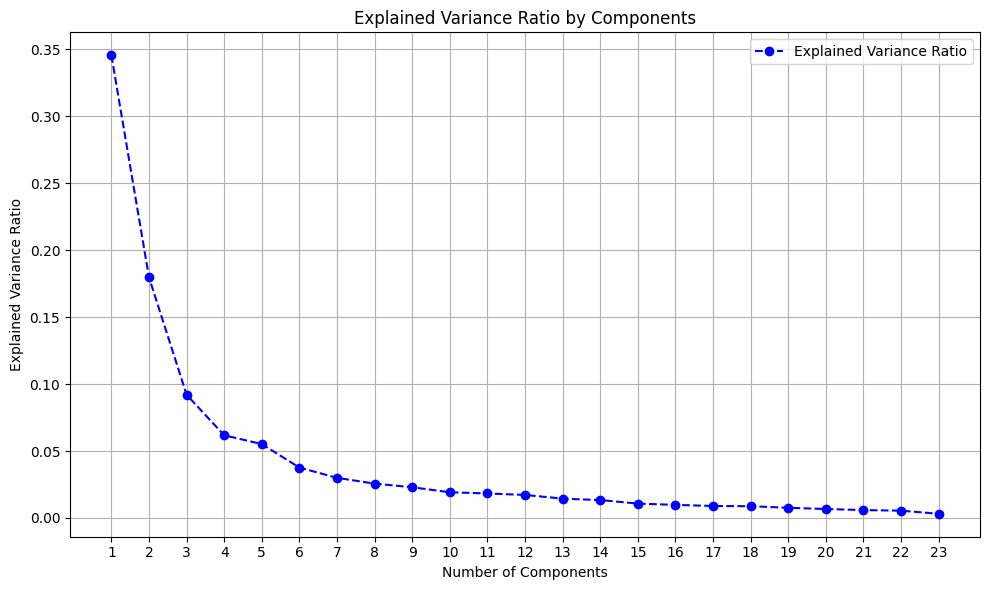

In [60]:
#TODO
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b', label='Explained Variance Ratio')
plt.title('Explained Variance Ratio by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

therefore we are going to pick 5 components

In [61]:
#TODO
#print the total explained variance ration for the first 5 components

n_selected_components = 5

pca_5c = CustomPCA(n_components=n_selected_components)
pca_5c.fit(df_boxcoxed_scaled)
X_5c = pca_5c.transform(df_boxcoxed_scaled)

explained_variance_ratio_5c = pca_5c.get_explained_variance_ratio()
print(sum(explained_variance_ratio_5c))

0.734238306552201


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [68]:
#TODO

_5c_df = pd.DataFrame(X_5c, columns=[f"c{i+1}" for i in range(n_selected_components)], index=df_boxcoxed_scaled.index)

df_cpy = df.copy()
df_cpy.set_index('ID', inplace=True)

columns_to_include = ["FoodGroup", "ShortDescrip", "Descrip"]
for col in columns_to_include:
    _5c_df[col] = df_cpy.loc[_5c_df.index, col].values

_5c_df.head()

,c1,c2,c3,c4,c5,FoodGroup,ShortDescrip,Descrip
ID,,,,,,,,
1001,2.638414,1.702512,-1.283725,-3.759546,-2.413650,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted"
1002,2.537931,1.550464,-1.279816,-3.634065,-2.492683,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt"
1003,3.751335,2.080190,-2.067932,-3.668154,-2.457203,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous"
1004,-2.000578,1.361858,0.395834,-2.432792,-0.887796,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue"
1005,-1.582713,1.321484,0.238444,-2.597599,-1.286317,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick"


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

In [69]:
#TODO

correlation_matrix_pca = _5c_df.iloc[:, :n_selected_components].corr()

corr_check_pca = pd.DataFrame(correlation_matrix_pca.round(10))

corr_check_pca.head()

,c1,c2,c3,c4,c5
c1,1.0,0.0,0.0,-0.0,-0.0
c2,0.0,1.0,-0.0,-0.0,-0.0
c3,0.0,-0.0,1.0,-0.0,0.0
c4,-0.0,-0.0,-0.0,1.0,0.0
c5,-0.0,-0.0,0.0,0.0,1.0


# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [70]:
# TODO get eigenvectors

eigenvectors_df = pd.DataFrame(
    pca.get_components(), 
    columns=df_boxcoxed_scaled.columns
)

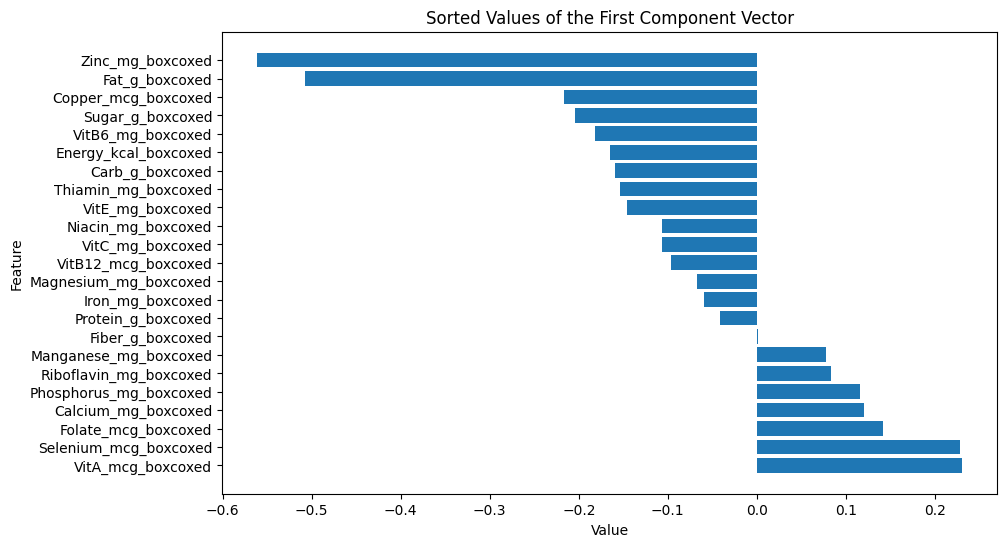

In [71]:
#TODO
plt.figure(figsize=(10, 6))
component = eigenvectors_df.iloc[0]
sorted_component = component.sort_values(ascending=False)
plt.barh(sorted_component.index, sorted_component.values)
plt.title(f'Sorted Values of the First Component Vector')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.grid(False)
plt.show()


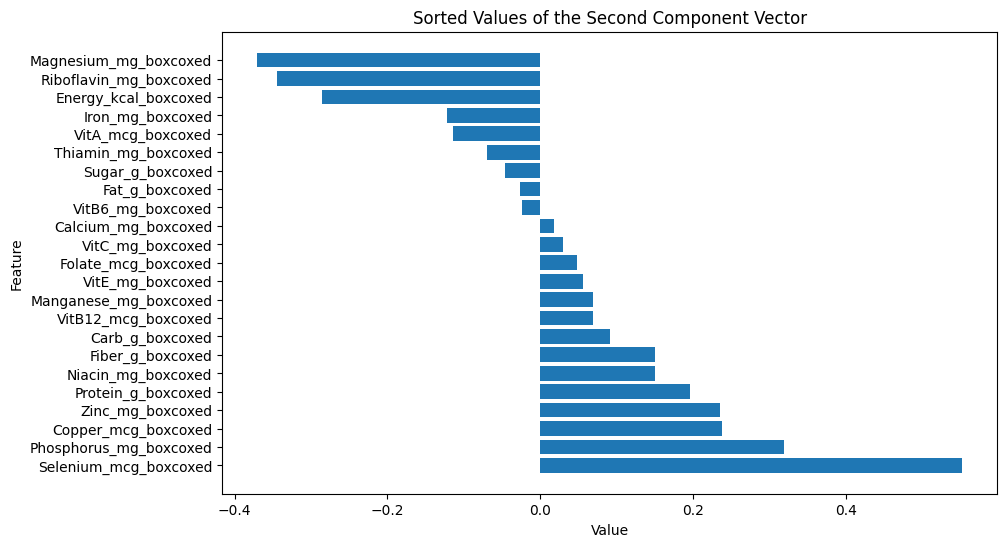

In [72]:
#TODO

plt.figure(figsize=(10, 6))
component = eigenvectors_df.iloc[1]
sorted_component = component.sort_values(ascending=False)
plt.barh(sorted_component.index, sorted_component.values)
plt.title(f'Sorted Values of the Second Component Vector')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.grid(False)
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;"> 
The plots show  the amount of contribution of different nutrients to the first and second components , the nutrients with the positive value have a positive effect on the component , and the nutrients with a negative value have a negative effect on the principal component; Also the more a nutrients bar for a principal component is larger the more effect it has on that especial component, for exmaple according to the first plot Zing_mg has the biggest influece (in a negative way) amongst other nutrients to the first princiapl component (or c1).

</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

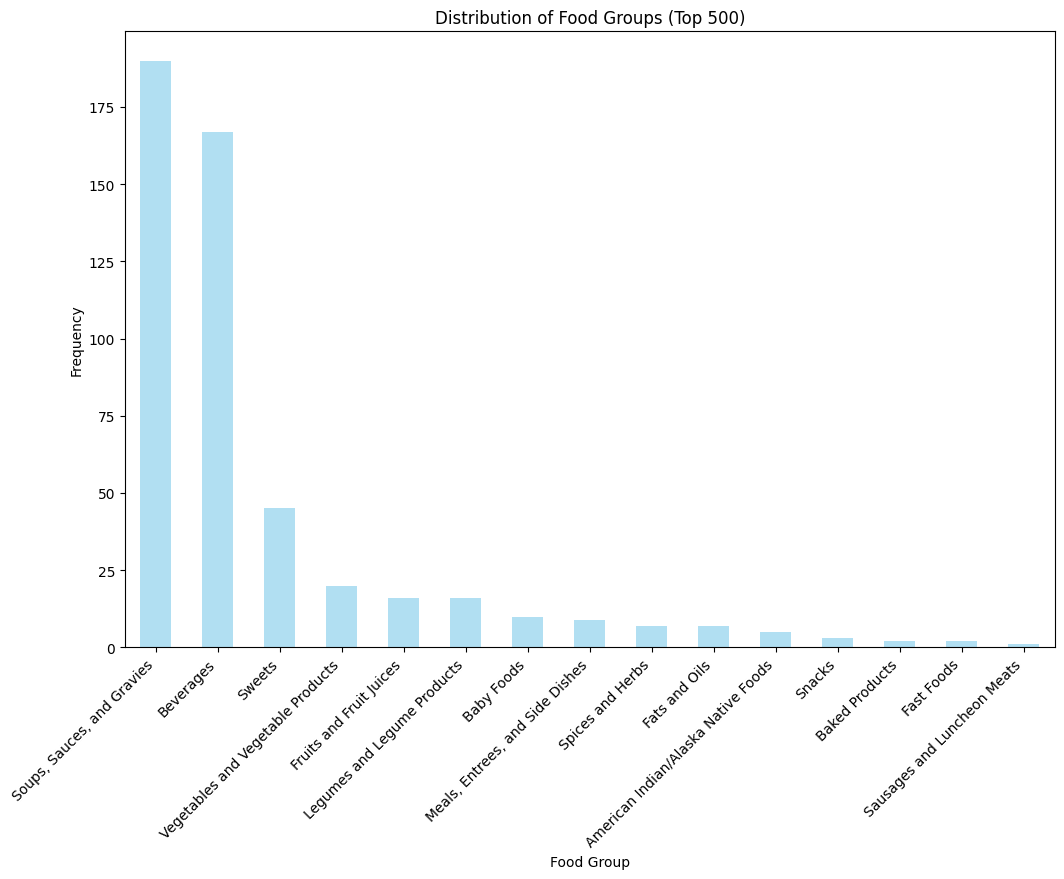

In [74]:
#TODO

top_500_pca1 = _5c_df.nlargest(500, 'c1')

plt.figure(figsize=(12, 8))
top_500_pca1['FoodGroup'].value_counts().plot(kind='bar', alpha=0.65, color="skyblue")
plt.title('Distribution of Food Groups (Top 500)')
plt.xlabel('Food Group')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

25it [00:01, 14.03it/s]


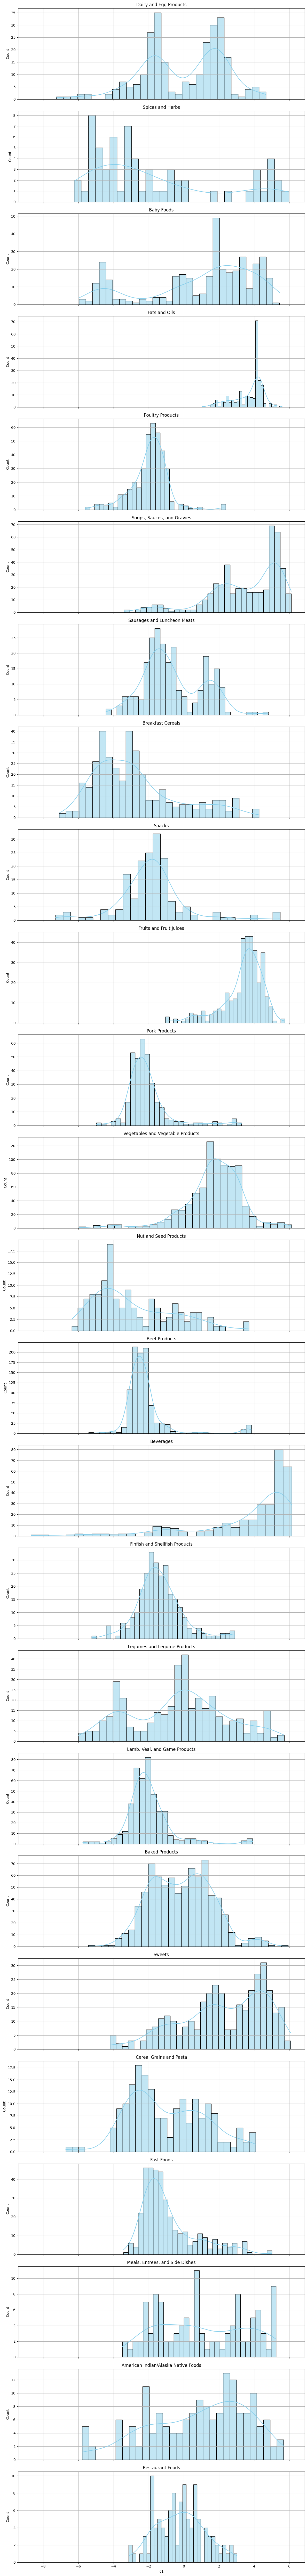

In [75]:
#TODO
from tqdm import  tqdm

unique_food_groups = _5c_df['FoodGroup'].unique()
n_groups = len(unique_food_groups)
fig, axes = plt.subplots(n_groups, 1, figsize=(12, 4 * n_groups), sharex=True)

for i, group in tqdm(enumerate(unique_food_groups)):
    subset = _5c_df[_5c_df['FoodGroup'] == group]
    sns.histplot(subset['c1'], bins=30, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(group)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')
    axes[i].grid(True)

plt.xlabel('c1')
plt.tight_layout()
plt.show()

Do the same for pca2.

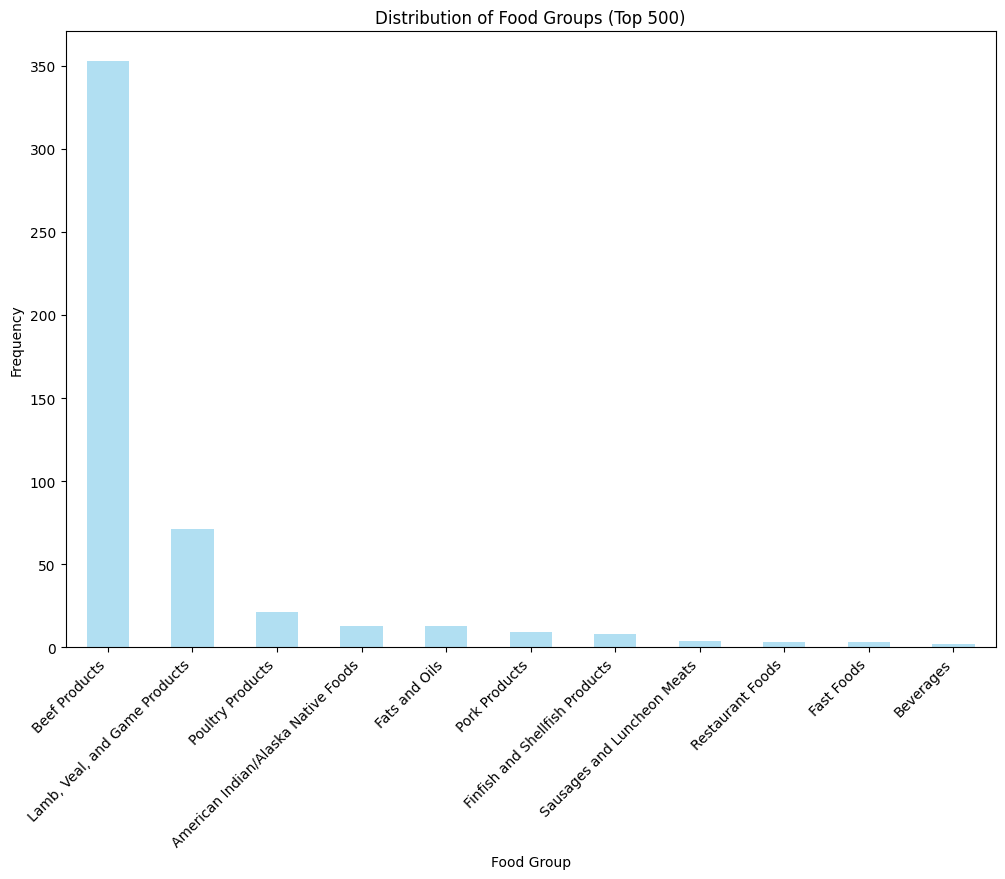

In [76]:
#TODO

top_500_pca1 = _5c_df.nlargest(500, 'c2')

plt.figure(figsize=(12, 8))
top_500_pca1['FoodGroup'].value_counts().plot(kind='bar', alpha=0.65, color="skyblue")
plt.title('Distribution of Food Groups (Top 500)')
plt.xlabel('Food Group')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()

25it [00:01, 14.41it/s]


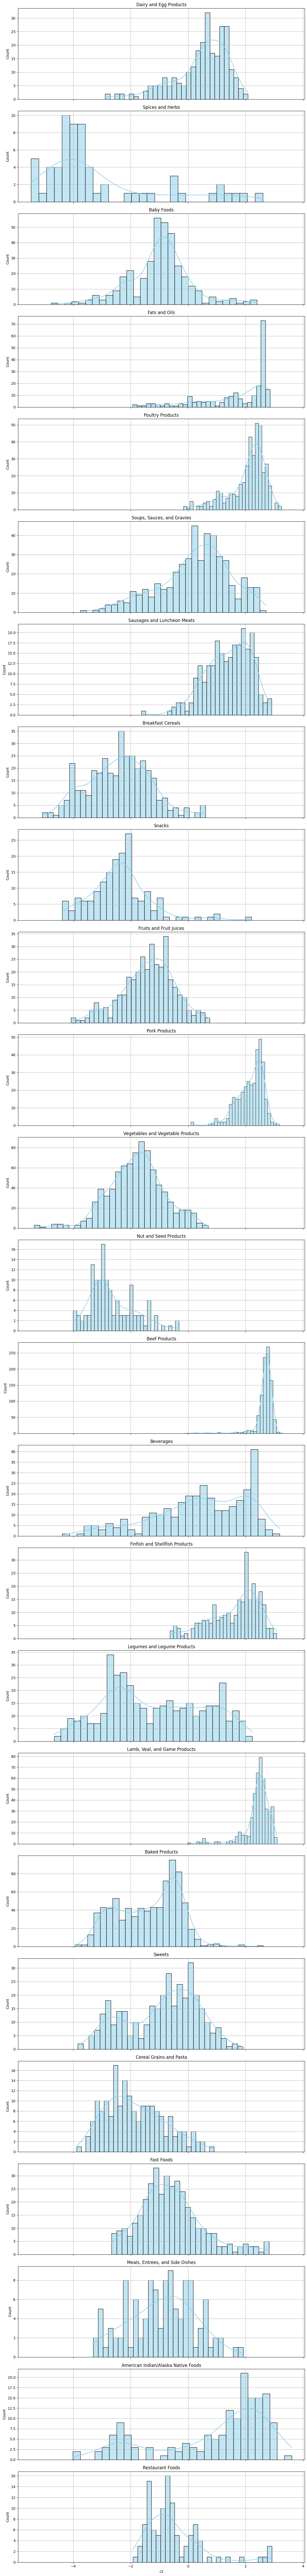

In [77]:
#TODO

unique_food_groups = _5c_df['FoodGroup'].unique()
n_groups = len(unique_food_groups)
fig, axes = plt.subplots(n_groups, 1, figsize=(12, 4 * n_groups), sharex=True)

for i, group in tqdm(enumerate(unique_food_groups)):
    subset = _5c_df[_5c_df['FoodGroup'] == group]
    sns.histplot(subset['c2'], bins=30, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(group)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')
    axes[i].grid(True)

plt.xlabel('c2')
plt.tight_layout()
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


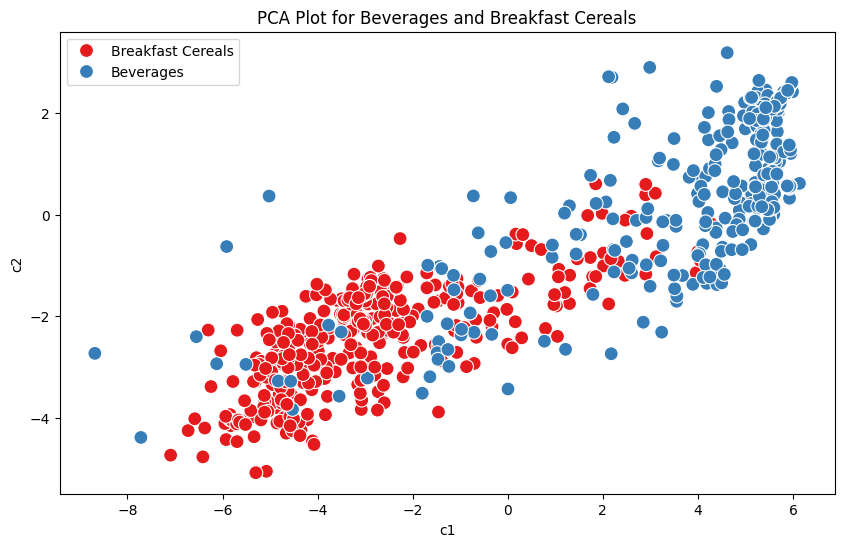

In [78]:
#TODO

selected_food_groups = ['Beverages', 'Breakfast Cereals']
filtered_df = _5c_df[_5c_df['FoodGroup'].isin(selected_food_groups)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='c1', y='c2', data=filtered_df, hue='FoodGroup', palette='Set1', s=100)
plt.title('PCA Plot for Beverages and Breakfast Cereals')
plt.grid(False)
plt.legend()
plt.show()


### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">We got familiar with the overal distribution of differenct nutrients for the first two principal components c1 and c2, and one of the things that could be inferred from these plots can be variablity of a specific nutrient, for example of this nutrient covers a wider range of differnet values for a principal component it meanse that this nutrient is a more general category and it is variable when compare to a different nutrient for example that for a principal component has compact and narrower values around a certain point, and in the last plot we can validate this fact again about beverages and breakfast cereals where breakfast cereals are wider and variable but Beverages are more compact and narrower (except a few outer dots) for c1 values.</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">As we can see in the distribution of PCA1 for breakfast ceareals we have larger values of c1 component when compared to PCA1 for bevarages which we see it has less values of c1 and when comparing these two facts with the plot just we recently drew we can confirm this fact again because the Berages group are mostly in the left part of the plot (less c1) and Breakfast cereals are mostly in the right part of the plot (larger c1 values)</span>

